In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 불러오기

In [3]:
df = pd.read_csv('./datas/auto-mpg.csv', header = None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


## 2. 데이터 전처리

In [4]:
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [14]:
pd.set_option('display.max_columns', 10)

In [16]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [29]:
df['horsepower'].replace('?', np.nan, inplace = True)

In [31]:
df.dropna(inplace = True, subset = ['horsepower'])

In [32]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [34]:
df['horsepower'] = df['horsepower'].astype('float')    #타입 변환

In [36]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

## 3. 분석에 사용할 특성(열, 변수) 선택(연비, 실린더, 마력, 중력)

In [37]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


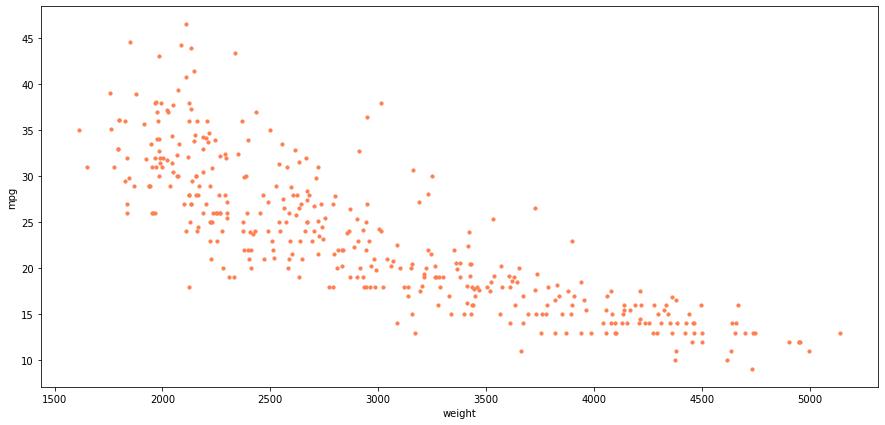

In [38]:
#종속변수(mgp)와 다른변수 간의 선형관계 존재 여부 확인
ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = 10, figsize = (15, 7))
plt.show()

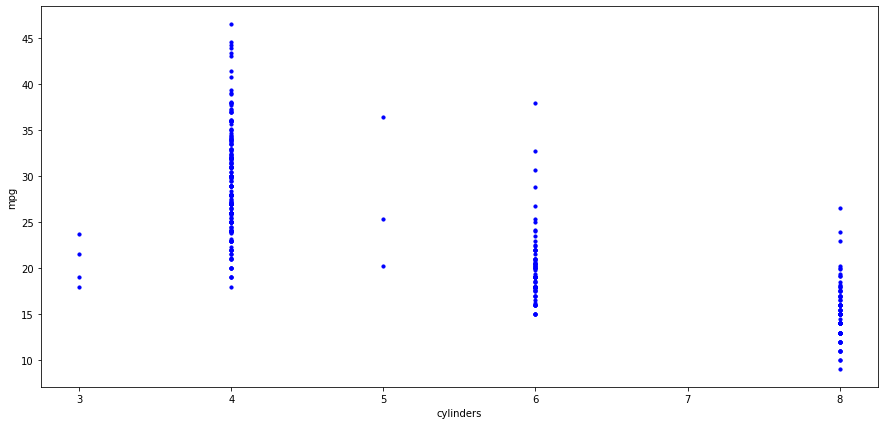

In [40]:
ndf.plot(kind = 'scatter', x = 'cylinders', y = 'mpg', c = 'blue', s = 10, figsize = (15, 7))
plt.show()

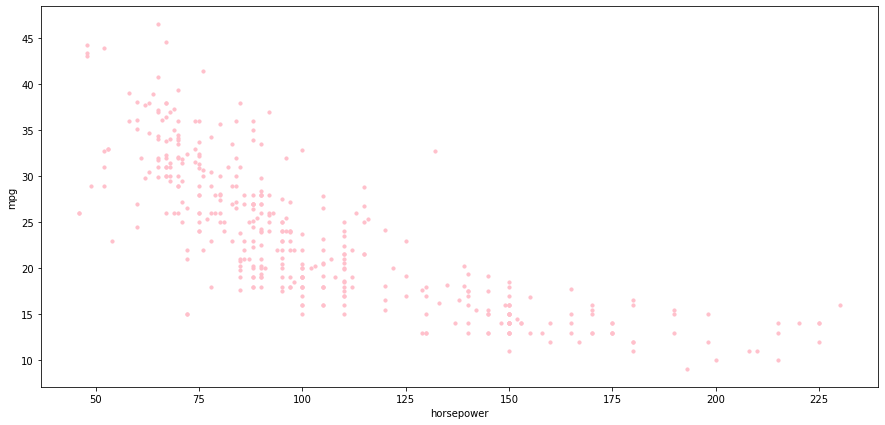

In [41]:
ndf.plot(kind = 'scatter', x = 'horsepower', y = 'mpg', c = 'pink', s = 10, figsize = (15, 7))
plt.show()

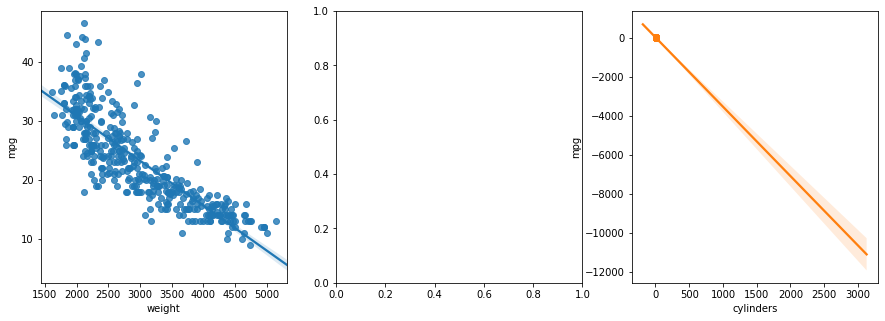

In [61]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1)
sns.regplot(x = 'cylinders', y = 'mpg', data = ndf, ax = ax2)
sns.regplot(x = 'horsepower', y = 'mpg', data = ndf, ax = ax3)
plt.show()
plt.close()

In [54]:
sns.joinplot(x='weight', y='mpg', data=ndf)
sns.joinplot(x='weight', y='mpg', data=ndf, kind='reg')  #회귀선 표시
plt.show()
plt.close()

AttributeError: module 'seaborn' has no attribute 'joinplot'

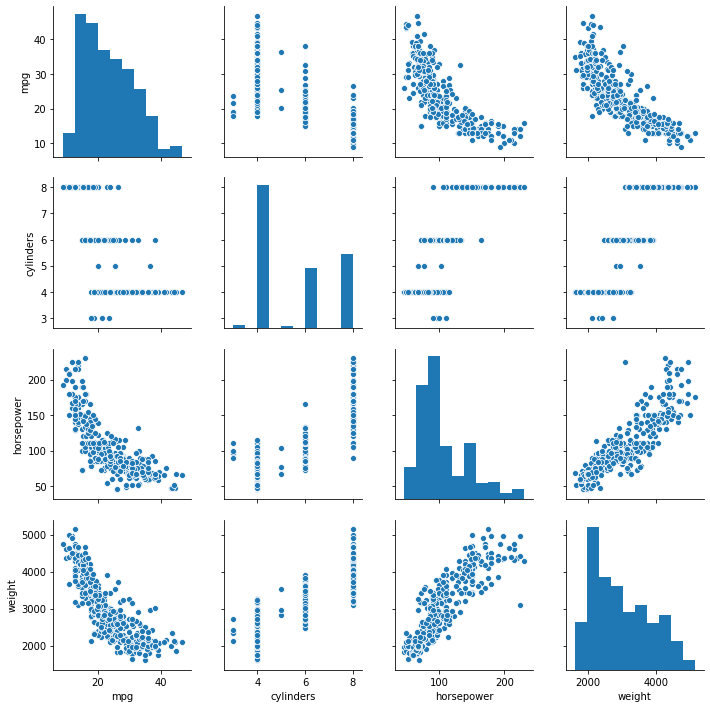

In [55]:
sns.pairplot(ndf)
plt.show()
plt.close()

## 4. 학습 데이터와 테스트 데이터 분리

In [62]:
X = ndf[['weight']]
Y = ndf[['mpg']]

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)    #학습

r_square = lr.score(X_test, Y_test)
print(r_square)

0.6822458558299325


In [67]:
print('기울기 a: ', lr.coef_)
print('절편 b: ', lr.intercept_)

기울기 a:  [[-0.00775343]]
절편 b:  [46.71036626]


In [69]:
y_predict = lr.predict(X)

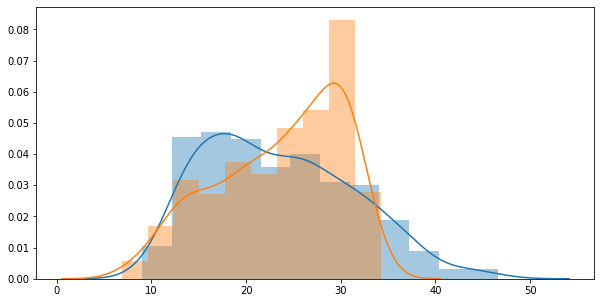

In [73]:
#실제 데이터와 예측 데이터 그래프
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = Falselabel = 'Y')
ax2 = sns.distplot(y_predict, label = 'y_predict', ax = ax1)
plt.show()
plt.close()